# Dylan Forsythe

## Research Interests

Since pursuing a degree in data science, I have been constantly introduced to various ways of observing and exploring data through tables, charts, graphs, etc. I very much enjoy the visualization of dataframes by turning them into visually appealing graphs because doing so helps me understand the data. By learning how to customize these graphs, theres an almost unlimited amount of stories that can be created. That is where the spark of my research interests lay. I wish to find the stories in the data that are not apparent without the steps involved with data analysis.
For this project, my interest is in learning about the popularities of some of the the sports over the history that the sport has been played in the Olympics. So far, I'm mostly interested in winter olympic sports like snowboarding because I recently learned how to snowboard, and figure skating simply because I think its pretty. I am hoping to find the information necessary to answer my questions by looking at how many participants are in the Olympics in each of these sports, as well as see how those numbers change every 4 years. 

## Research Question 1
**How have the popularities of Snowboarding and Figure Skating (i.e. amount of participants / competitors) changed over time?**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Set the base theme for seaborn graphs
sns.set_theme(style='whitegrid',font_scale=1.25)

In [3]:
# Read raw data and save into seperate df's
OlympicResultsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv')
OlympicHostsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv')
OlympicMedalsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv')
OlympicAthletesDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_athletes.csv')

In [4]:
# Check the shape, and heads of each dataframe to get an idea of what information each one contains
#print(OlympicResultsDF.shape)
#OlympicResultsDF.head()

In [5]:
#print(OlympicHostsDF.shape)
#OlympicHostsDF.head()

In [6]:
#print(OlympicMedalsDF.shape)
#OlympicMedalsDF.head()

In [7]:
#print(OlympicAthletesDF.shape)
#OlympicAthletesDF.head()

In [8]:
Research_df_merged = pd.merge(OlympicResultsDF, OlympicAthletesDF, how='outer')
Research_df_merged = pd.merge(Research_df_merged, OlympicMedalsDF, how='outer')
Research_df_merged = pd.merge(Research_df_merged, OlympicHostsDF, left_on='slug_game', right_on='game_slug')
Research_df_merged = Research_df_merged.drop(columns=['first_game','athlete_full_name','game_slug','athletes','value_unit','value_type',
                                 'games_participations','athlete_url','participant_type',
                                 'rank_equal','rank_position','country_name','country_code',
                                 'country_3_letter_code','athlete_year_birth','bio',
                                 'athlete_medals','event_gender','participant_title',
                                 'game_end_date','game_start_date','game_season','slug_game'])

In [9]:
# Since we only want to look at the sports of Snowboarding and Figure Skating, I want to make a
# dataframe containing only these two sports

Snow_and_Skate_df = Research_df_merged[Research_df_merged['discipline_title'].isin(['Snowboard', 'Figure skating'])]
Snow_and_Skate_df = Snow_and_Skate_df.reset_index(drop=True)

In [23]:
Snow_and_Skate_df = Snow_and_Skate_df.rename(columns={'discipline_title' : 'Sport',
                                  'event_title' : 'Sporting Event Name',
                                  'medal_type' : 'Awarded Medal',
                                  'game_location' : 'Olympic Host',
                                  'game_name' : 'Olympic Name',
                                  'game_year' : 'Year'})
Snow_and_Skate_df = Snow_and_Skate_df.reset_index(drop=True)
Snow_and_Skate_df

,Sport,Sporting Event Name,Awarded Medal,Olympic Host,Olympic Name,Year
0,Snowboard,Mixed Team Snowboard Cross,GOLD,China,Beijing 2022,2022
1,Snowboard,Mixed Team Snowboard Cross,SILVER,China,Beijing 2022,2022
2,Snowboard,Mixed Team Snowboard Cross,BRONZE,China,Beijing 2022,2022
3,Snowboard,Mixed Team Snowboard Cross,NaN,China,Beijing 2022,2022
4,Snowboard,Mixed Team Snowboard Cross,NaN,China,Beijing 2022,2022
...,...,...,...,...,...,...
3600,Figure skating,Pairs mixed,SILVER,Great Britain,London 1908,1908
3601,Figure skating,Pairs mixed,BRONZE,Great Britain,London 1908,1908
3602,Figure skating,Pairs mixed,BRONZE,Great Britain,London 1908,1908
3603,Figure skating,Pairs mixed,GOLD,Great Britain,London 1908,1908


In [154]:
Snow_and_Skate_per_Sport = Snow_and_Skate_df.groupby(['Year', 'Olympic Name', 'Sport'])['Olympic Host'].count().reset_index()
Snow_and_Skate_per_Sport = Snow_and_Skate_per_Sport.rename(columns={'Olympic Host' : 'Number of Participants'})
Snow_and_Skate_per_Sport

,Year,Olympic Name,Sport,Number of Participants
0,1908,London 1908,Figure skating,29
1,1920,Antwerp 1920,Figure skating,31
2,1924,Chamonix 1924,Figure skating,39
3,1928,St. Moritz 1928,Figure skating,56
4,1932,Lake Placid 1932,Figure skating,46
5,1936,Garmisch-Partenkirchen 1936,Figure skating,95
6,1948,St. Moritz 1948,Figure skating,62
7,1952,Oslo 1952,Figure skating,58
8,1956,Cortina d'Ampezzo 1956,Figure skating,59
9,1960,Squaw Valley 1960,Figure skating,64


# Insights
1. There is no data for years 1912, 1916, 1940, and 1944. This is most likely because World Wars 1 and 2 were occuring during these dates. I'll add these rows to the dataframe so it's easier to see when plotted.
1. Snowboarding was only introduced into the Olympics in 1998 in Nagano, Japan.
1. This dataframe does not seperate mens, womens, and mixed (figure skating) which could also be another dataframe to look into in the future.

In [155]:
Snow_and_Skate_per_Sport.loc[0.1] = '1912', np.nan, np.nan, 0
Snow_and_Skate_per_Sport.loc[0.2] = '1916', np.nan, np.nan, 0
Snow_and_Skate_per_Sport.loc[5.1] = '1940', np.nan, np.nan, 0
Snow_and_Skate_per_Sport.loc[5.2] = '1944', np.nan, np.nan, 0
Snow_and_Skate_per_Sport = Snow_and_Skate_per_Sport.sort_index().reset_index(drop=True)

<AxesSubplot: xlabel='Year', ylabel='Number of Participants'>

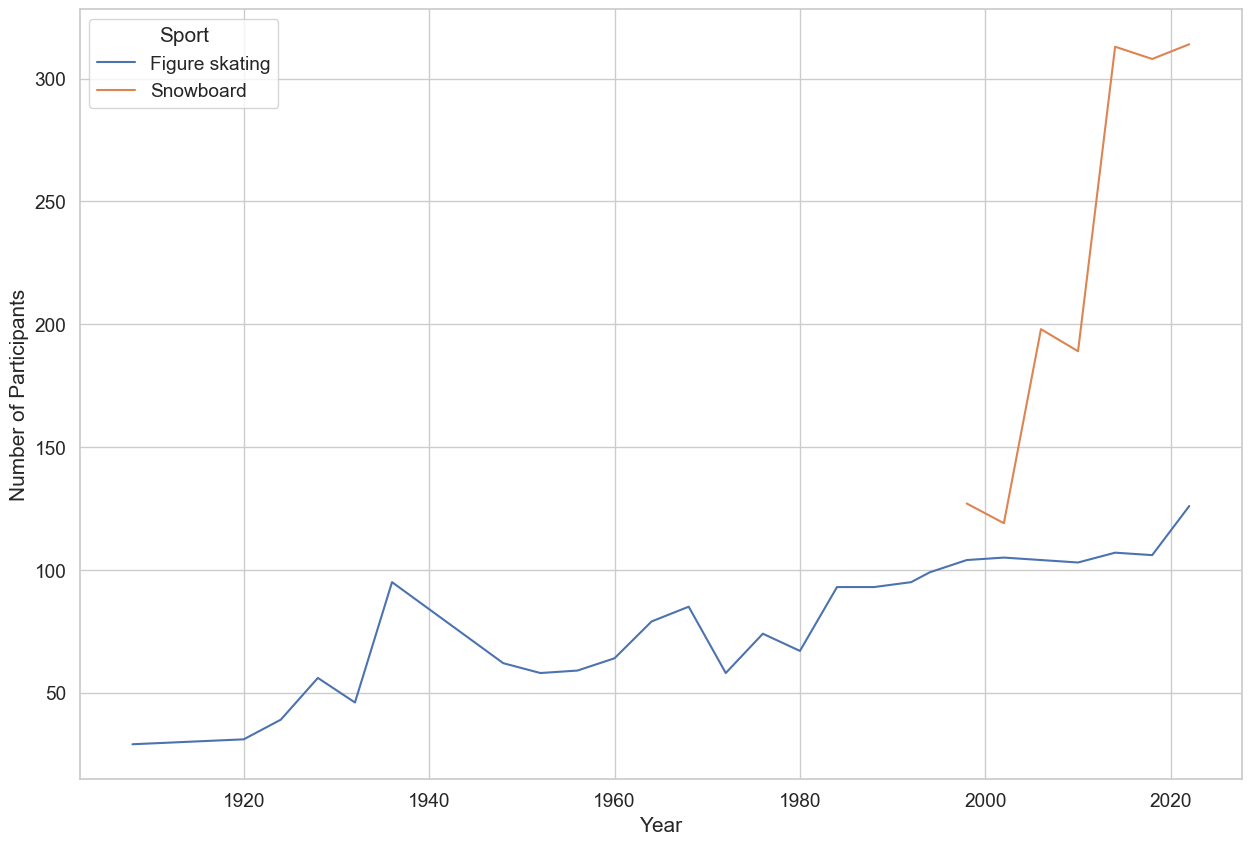

In [156]:
plt.figure(figsize=(15, 10))
sns.lineplot(data= Snow_and_Skate_per_Sport,
             x= 'Year', y= 'Number of Participants',hue= 'Sport')

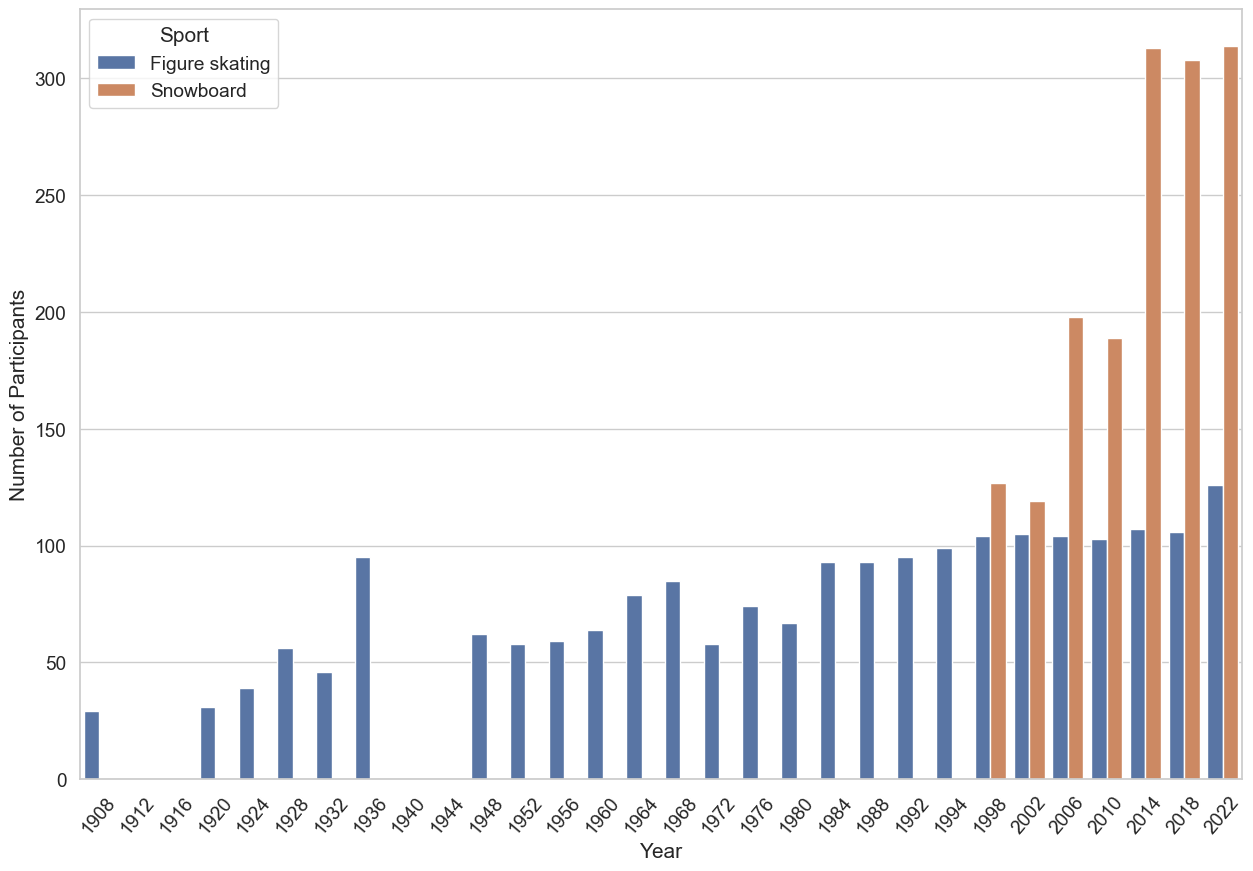

In [159]:
plt.figure(figsize=(15, 10))
RQ1bar = sns.barplot(data= Snow_and_Skate_per_Sport, x= 'Year', y='Number of Participants', hue='Sport')
RQ1bar.set_xticklabels(RQ1bar.get_xticklabels(), rotation=50)
plt.legend(loc='upper left', title= 'Sport')
None

---

# Potential Research Question 2 (if question 1 doesn't pan out)

**How many athletes obtained a medal in their first appearance in the Olympics?**
PLAN:
- drop all na's
- Combine Athletes DF with Results DF and check if the 'first_game' column matches the 'slug_game' column with a medal listed


In [ ]:
mergedDF = pd.merge(OlympicResultsDF, OlympicAthletesDF, how='inner')
mergedDF = pd.merge(mergedDF, OlympicMedalsDF, how='inner')
OlympicHostsDF = OlympicHostsDF.rename(columns={'game_slug' : 'slug_game'})
mergedDF = pd.merge(mergedDF, OlympicHostsDF, how='inner')

In [ ]:
mergedDF = mergedDF.drop(columns=['athlete_url','value_type','games_participations','participant_type',
                       'athletes','rank_equal','rank_position','country_name','country_code',
                       'country_3_letter_code','athlete_year_birth','bio','athlete_medals','event_gender',
                       'participant_title','game_end_date','game_start_date','game_season','slug_game'])

In [ ]:
mergedDF = mergedDF.dropna(subset=['medal_type'])

In [ ]:
mergedDF = mergedDF.sort_values('game_year')

In [ ]:
mergedDF = mergedDF[mergedDF['first_game'] == mergedDF['game_name']]

In [ ]:
mergedDF = mergedDF.rename(columns={'discipline_title' : 'Sport',
                                    'event_title' : 'Sport Category',
                                    'medal_type' : 'Medal Awarded',
                                    'athlete_full_name' : 'Athlete Name',
                                    'value_unit' : 'Event Score',
                                    'first_game' : 'First Game',
                                    'game_location' : 'Game Location',
                                    'game_name' : 'Game Name',
                                    'game_year' : 'Game Year'})

In [ ]:
mergedDF = mergedDF.reset_index(drop=True)
mergedDF

In [ ]:
Gold = mergedDF[mergedDF['Medal Awarded'] == 'GOLD']
Silver = mergedDF[mergedDF['Medal Awarded'] == 'SILVER']
Bronze = mergedDF[mergedDF['Medal Awarded'] == 'BRONZE']

In [ ]:
Goldticks = Gold['Sport'].unique()

In [ ]:
goldPerSport = Gold[['Sport', 'Medal Awarded']].groupby('Sport').count()

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(35,10))
sns.lineplot(goldPerSport,markers=True)
sns.despine
plt.xlim(-1)
plt.xticks(Goldticks, rotation=65)
None

*This linegraph plots the amount of gold medals earned by athletes in their first appearance at an Olympic event. This is a total count dating back to the 1890's until 2022. The amounts of Gold medals earned in each sport at its max is less than 500. Therefore, I can deduce that it is highly unlikely for someone new to achieve this feat.*

---

In [ ]:
dfplt = sns.histplot(mergedDF, legend=False)

*A notable point on this graph is the lack of data between 1940 and 1945. This is presumably because of World War 2.*

In [ ]:
SnwbrdDF = mergedDF[mergedDF['Sport'] == 'Snowboard']

In [ ]:
SnwbrdDF = SnwbrdDF.reset_index(drop=True)
SnwbrdDF

In [ ]:
sns.histplot(SnwbrdDF, palette='Blues', legend=False, alpha=1)
plt.title("Number of First Appearance Medal Winners for Snowboarding")
None

# Milestone 3 EDA Conclusion
Overall, I am not too certain on the where the line between EDA ends and when actual data analysis begins. So for this milestone, I "tried" to keep my visualizations simple but ran into so many errors with data wrangling that I spent far too much time on this milestone. I don't have much background with computer programming languages but I have 2 years of Java, and 1 year of R which is all self taught. Python was new to me for this class but it was simple enough to port over what I wanted to do by first thinking about how to do it in R.

As for the time spent, I spent about 15-18 hours working on this milestone. Trying to deal with all the cleaning, wrangling, and attempting to sort out the -- what felt like -- infinite amount of errors. That being said, my primary research queston (and interest) is giving me some grief because I cannot figure out how to extract the athletes names from the 'athletes' column. For team sports, athletes are grouped together along with their individual url. The original dataframe loads the column in containing strings that look like lists containing tuples. I could not figure out how to isolate each persons name, and make it so that each person had a row in the research_dataframe. Doing this would allow me to properly count the number of athletes that participated. Without being able to seperate those, I don't think I can get an accurate visualization of the popularity of each sport. This leads me to my next issue I was having.

Everything in my Research_DF dataframe is categorical and I could not figure out what I needed to do to get a numerical column in there for my visualizations. I'm wanting to know the total number of participants for each sport, per year that the olympics are held.

Since I could not figure out my research question 1, I moved to my 2nd question and found that merging all the dataframes together and then dropping the NaN's and columns that I did not want proved to be useful. Then by comparing an individuals first appearance with the Olympic games that they won a medal at, if they were the same, then this told me they won a medal on their first appearance. This value turned out to be only 7943 individuals in the history of the Olympics (or at least the history of this dataset).

---